## Food Chain Campaign


#### Business Goal
 To increase the sales for the new menu item.


#### Business Objective
Identify the most effective marketing strategy and implement it in selected markets to drive sales growth for the new menu item.

#### Libraries to be loaded

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (10,10)

plt.style.use("ggplot")
%matplotlib inline 

### Data Structure

In [2]:
#Load the data
df = pd.read_csv('/Users/hailing/Downloads/Project Template/Chapter_10_-_End_to_End_EDA/WA_Marketing-Campaign.csv')

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.tail()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29
547,10,Large,920,14,2,4,49.41


In [5]:
#Check for shape
df.shape

(548, 7)

In [6]:
#Check for column values
df.columns.values

array(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'], dtype=object)

In [7]:
#Check for the null values and dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [8]:
#Descriptive statistics
df.describe(include='all')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548,548.000000,548.000000,548.000000,548.000000,548.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Medium,NaN,NaN,NaN,NaN,NaN
freq,NaN,320,NaN,NaN,NaN,NaN,NaN
mean,5.715328,NaN,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,NaN,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,NaN,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,NaN,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,NaN,708.000000,12.000000,3.000000,3.250000,60.477500


In [9]:
#Count of null values
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Note: There are no null values identified in this dataset

In [10]:
#Check for duplicated rows
df.duplicated().sum()

0

Note: There are no duplicated rows identified in this dataset

In [11]:
#Check for data types
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

Note: According to the information above, we have categorised the columns into categorical and numerical columns.

#### Categorical columns:

* MarketSize
* Promotion
* Week
* Market ID
* Location ID
* Age Of Store

#### Numerical columns:

* Sales In Thousands

In [12]:
#Data Aggregation- For Categorical Columns we check the count of unique entries and their values
print(df["MarketSize"].nunique())
print(df["MarketSize"].unique())

3
['Medium' 'Small' 'Large']


In [13]:
print(df["Promotion"].nunique())
print(df["Promotion"].unique())

3
[3 2 1]


In [14]:
print(df["week"].nunique())
print(df["week"].unique())

4
[1 2 3 4]


In [15]:
print(df["MarketID"].nunique())
print(df["MarketID"].unique())

10
[ 1  2  3  4  5  6  7  8  9 10]


In [16]:
print(df["LocationID"].nunique())
print(df["LocationID"].unique())

137
[  1   2   3   4   5   6   7   8   9  10  11  12  13 101 102 103 104 105
 106 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 301 302 303 304 305 306 307 308 309 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 701 702 703 704 705 706 707 708 709 710 711 712 801
 802 803 804 805 806 807 808 809 810 901 902 903 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920]


In [17]:
print(df["AgeOfStore"].nunique())
print(sorted(df["AgeOfStore"].unique()))

25
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28]


In [18]:
#Data Aggregation- For the Numerical Columns lets find the minimum and maximum values
print("min =",df["SalesInThousands"].min())
print("max =",df["SalesInThousands"].max())

min = 17.34
max = 99.65


**Target Variable Analysis**

The target variable for this dataset is 'Promotion'

In [19]:
#Count of target variable
df['Promotion'].value_counts()

3    188
2    188
1    172
Name: Promotion, dtype: int64

In [20]:
#Percentage of each value in Promotion column
df['Promotion'].value_counts()/len(df)*100

3    34.306569
2    34.306569
1    31.386861
Name: Promotion, dtype: float64

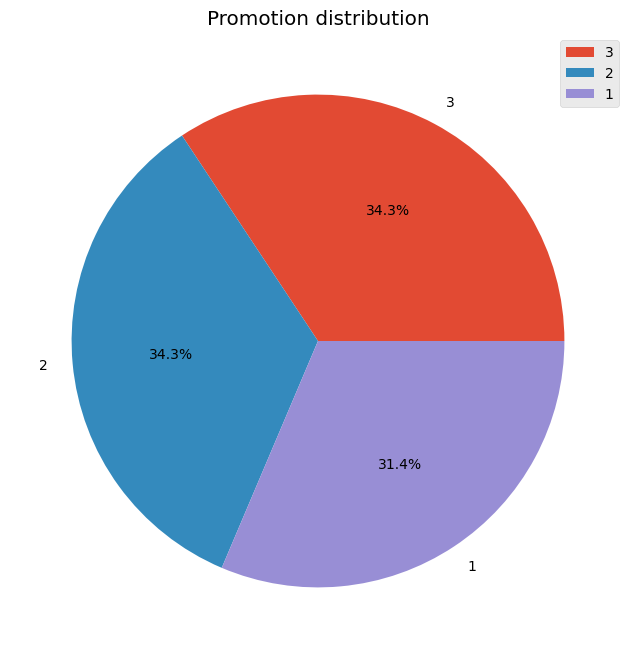

In [21]:
#Bar chart showing the distribution for the values in Promotion column
plt.figure(figsize=(20,8))
counts = df['Promotion'].value_counts()

plt.pie(counts, labels= counts.index, autopct='%1.1f%%')
plt.title('Promotion distribution')
plt.legend(counts.index, loc='upper right')  
plt.show()

Insights: Promotion 2 and Promotion 3 have the same percentage of distribution at 34.3%, while Promotion 1 has a lower percentage of distribution at 31.4%

### Data Cleaning


In [22]:
#Missing Values
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Note: Since there are no missing values, no further action is needed on missing values handling.

In [23]:
#Data Type
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

Note: The data types for each column appears to be correct, no further action is needed for changing data types.

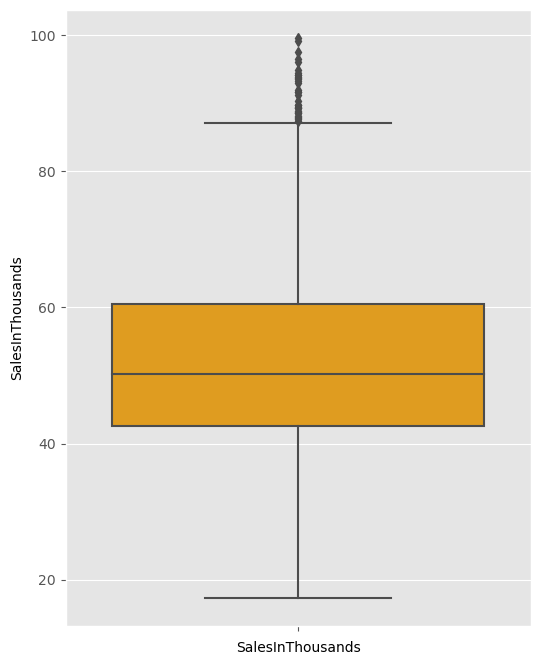

In [24]:
# Outliers for 'SalesInThousands' column using boxplot
column_to_plot = 'SalesInThousands'

# Create a boxplot for the specified column
plt.figure(figsize=(6, 8))  
sns.boxplot(data=df, y=column_to_plot, orient="v", color="orange")

# Customize plot labels and titles if needed
plt.xlabel(column_to_plot) 

# Show the plot
plt.show()


In [25]:
#Outliers of SalesInThousands using IQR
q1, q3=df['SalesInThousands'].quantile([0.25,0.75])
iqr = q3- q1

lower_min = q1 - (1.5*iqr)
upper_max = q3 + (1.5*iqr)

lower_min = round(lower_min, 2)
upper_max = round(upper_max, 2)

print("Lower expected min of IQR =", lower_min)
print("Upper expected max of IQR =", upper_max)

Lower expected min of IQR = 15.65
Upper expected max of IQR = 87.38


In [26]:
outliers=df[(df['SalesInThousands'] > 87.38) | (df['SalesInThousands'] < 15.65 )]
outliers

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
80,3,Large,202,8,1,1,88.73
83,3,Large,202,8,1,4,94.17
84,3,Large,203,12,3,1,89.70
88,3,Large,204,1,2,1,87.43
90,3,Large,204,1,2,3,88.12
93,3,Large,205,19,3,2,90.30
95,3,Large,205,19,3,4,89.77
99,3,Large,206,11,3,4,88.91
100,3,Large,207,1,3,1,87.70
103,3,Large,207,1,3,4,94.21


In [27]:
outliers.count()

MarketID            33
MarketSize          33
LocationID          33
AgeOfStore          33
Promotion           33
week                33
SalesInThousands    33
dtype: int64

Note: There are 33 outliers for 'SalesInThousands' column as they fall out of the lower expected min and upper expected max of IQR. As seen from the box plot, the outliers are mainly out of the upper expected max range.

In [28]:
#Duplicated data
df.duplicated().sum()

0

Note: Since there are no duplicated rows in the dataset, no further action is neeeded for removing duplicated data.

In [29]:
#Updating the column names
df.rename(columns={'MarketID': 'Market ID', 'MarketSize': 'Market Size', 'LocationID':'Location ID', 'AgeOfStore':'Age Of Store','week':'Week','SalesInThousands':'Sales In Thousands'}, inplace=True)
df.head()

,Market ID,Market Size,Location ID,Age Of Store,Promotion,Week,Sales In Thousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


Note: Added a space between each words and updated the first letter for each column to capital letter.

## Data Analysis



**Question1 :Distribution of market size**

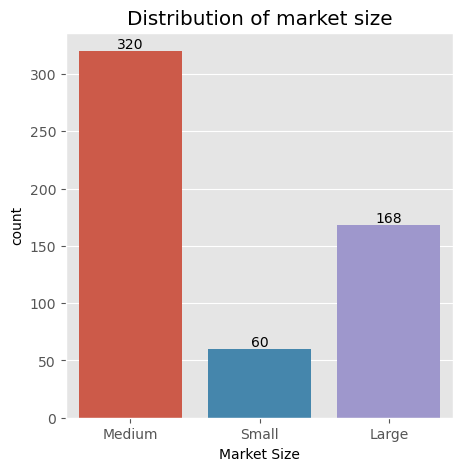

In [30]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df , x = 'Market Size')
ax.bar_label(ax.containers[0])
plt.title('Distribution of market size')
plt.show()

Insights: Small market size has the lowest count at 60 while Medium market size has the highest count at 320.

**Question 2: Distribution of Market ID**

Text(0.5, 1.0, 'Distribution of Market ID')

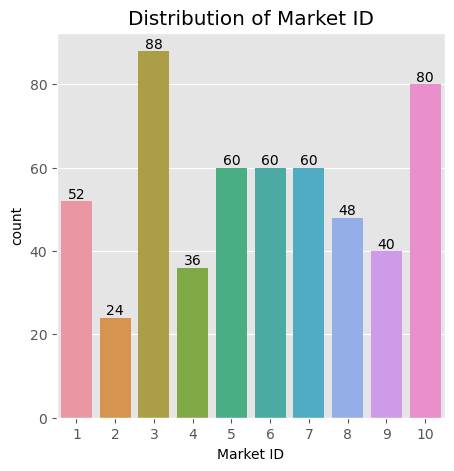

In [31]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df , x = 'Market ID')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Market ID')

Insights: Market ID 3 has the highest count at 88 while Market ID 2 has the lowest count at only 24.

**Question 3: Distribution of age of store**

Text(0.5, 0, 'Age of Stores')

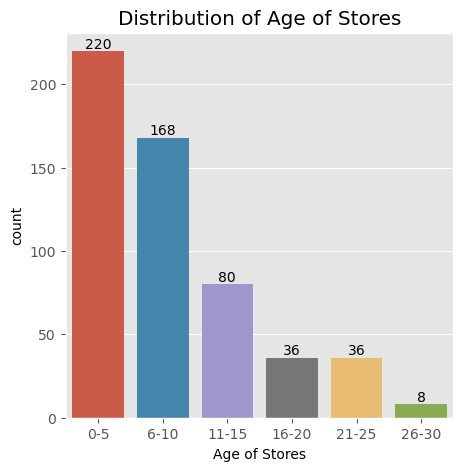

In [32]:
fig = plt.figure(figsize = (5,5))
df["AgeBin"] = pd.cut(df["Age Of Store"], bins=[0, 5, 10, 15, 20, 25, 30], labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"])
age_grouped = df.groupby(["AgeBin", "Promotion"])["Sales In Thousands"].mean().reset_index()
ax = sns.countplot(df , x = "AgeBin")
ax.bar_label(ax.containers[0])
plt.title('Distribution of Age of Stores')
plt.xlabel('Age of Stores')

In [33]:
#Percentage of each value in AgeBin column
Age=(df['AgeBin'].value_counts()/len(df)*100).round(2)
Age

0-5      40.15
6-10     30.66
11-15    14.60
16-20     6.57
21-25     6.57
26-30     1.46
Name: AgeBin, dtype: float64

Insights: Most stores are aged between 0-5 years old(40.15%), while only 1.46% of stores are aged 26-30 years old. The majority of stores are aged between 0-15 years as compared to very few stores aged 16 years and above.

**Question 4: How does the sales look over time?**

In [34]:
df.groupby('Week')['Sales In Thousands'].agg([np.mean,np.sum])

,mean,sum
Week,,
1,53.790584,7369.31
2,53.386569,7313.96
3,53.474599,7326.02
4,53.213066,7290.19


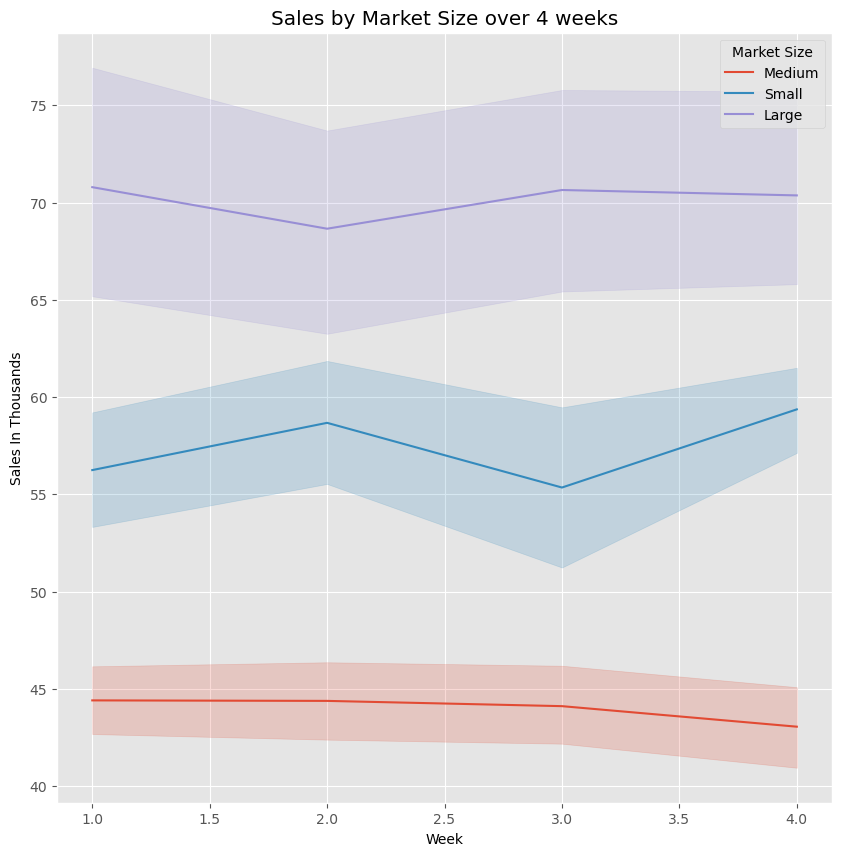

In [35]:
# Sales by market size
sns.lineplot(x = 'Week',y = 'Sales In Thousands',hue='Market Size',data=df)
plt.title('Sales by Market Size over 4 weeks')
plt.xlabel('Week')
plt.ylabel('Sales In Thousands')
plt.show()

Insights: There is no significant fluctuation of sales by market size over the 4 week period. Large market size generates the most sales while medium market size records the lowest sales among the 3 types of sales.

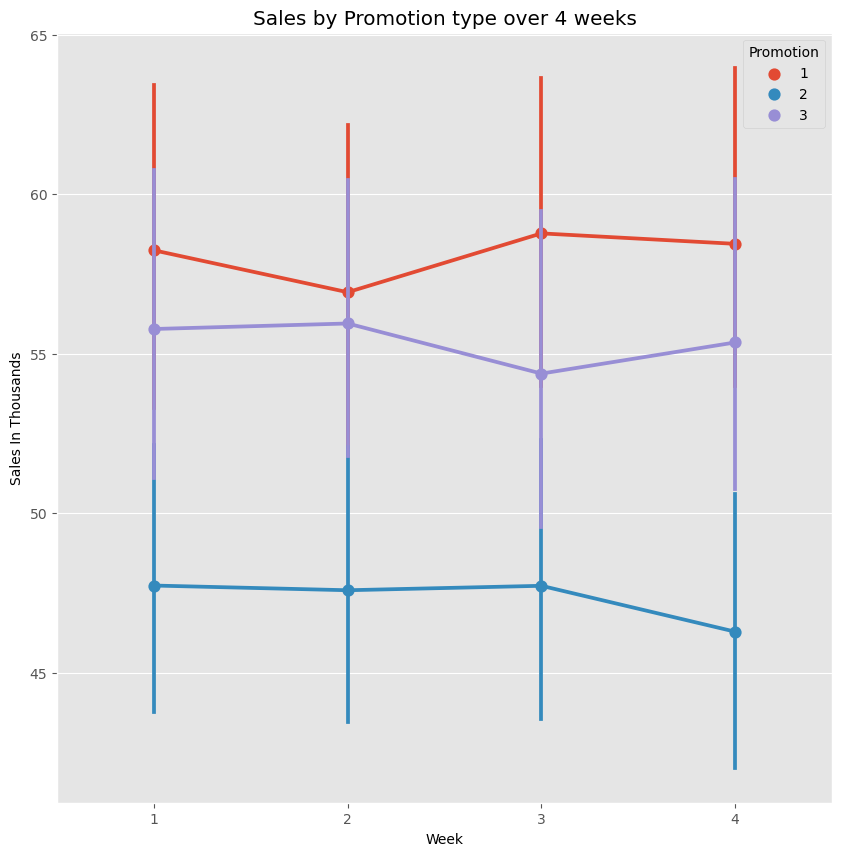

In [36]:
# Sales by promotion type
sns.pointplot(data=df, x='Week', y='Sales In Thousands', hue='Promotion')
plt.title('Sales by Promotion type over 4 weeks')
plt.xlabel('Week')
plt.ylabel('Sales In Thousands')
plt.show()

Insights: There is no significant fluctuation of sales by promotion type over the 4 week period. Promotion 1e generates the most sales while Promotion 2 records the lowest sales among the 3 types of promotion type.

**Question 5: Which market ID generates the most sales by promotion type?**

In [37]:
df.groupby('Market ID')['Sales In Thousands'].agg([np.mean,np.sum])

,mean,sum
Market ID,,
1,35.101731,1825.29
2,61.761250,1482.27
3,84.971705,7477.51
4,54.508056,1962.29
5,48.838000,2930.28
6,36.397500,2183.85
7,44.475333,2668.52
8,48.952917,2349.74
9,52.940750,2117.63


/var/folders/s2/r5xn6dmj38v0rrs7t53585bc0000gn/T/ipykernel_96534/823730964.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Market ID', y='Sales In Thousands', hue='Promotion', ci=None)


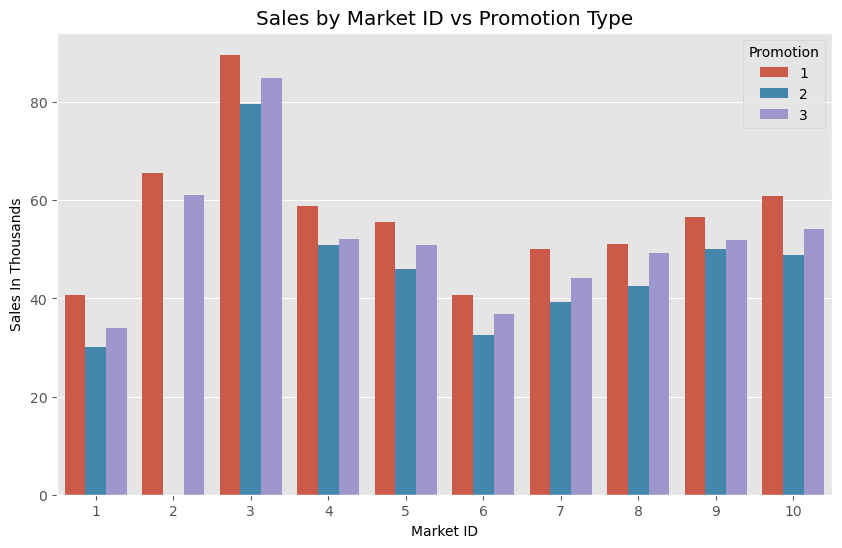

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Market ID', y='Sales In Thousands', hue='Promotion', ci=None)
plt.title('Sales by Market ID vs Promotion Type')
plt.xlabel('Market ID')
plt.ylabel('Sales In Thousands')
plt.legend(title='Promotion')
plt.show()

Insights: Promotion 1 from Market ID 3 generates the most sales, while promotion 2 from Market ID 1 generates the lowest sales. Market ID 3 generates the most sales on aggregate while Market ID 1 generates the lowest sales. 

Note: There is no Promotion 2 for Market ID 2

**Question 6: Which market size generates the most sales and promotion type?** 

In [39]:
df.groupby('Market Size')['Sales In Thousands'].agg([np.mean,np.sum])

,mean,sum
Market Size,,
Large,70.116726,11779.61
Medium,43.985344,14075.31
Small,57.409333,3444.56


/var/folders/s2/r5xn6dmj38v0rrs7t53585bc0000gn/T/ipykernel_96534/952804246.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Market Size', y='Sales In Thousands', hue='Promotion', ci=None)


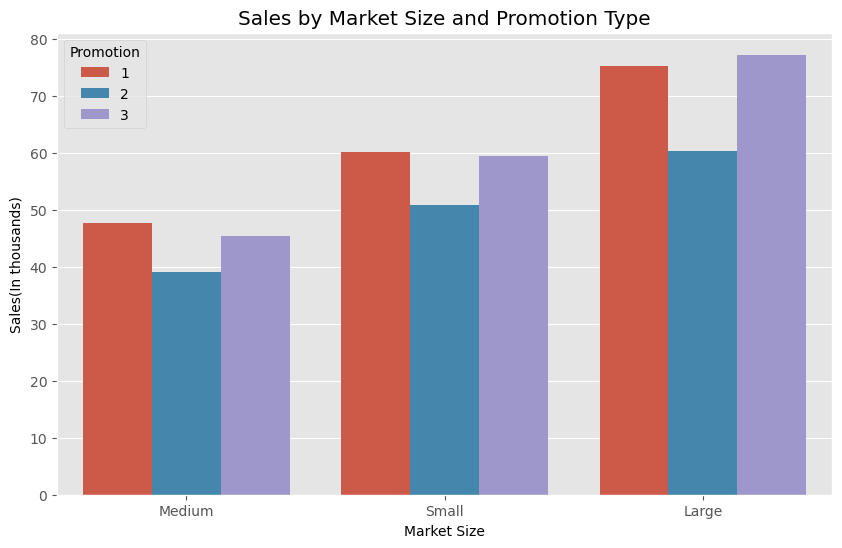

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Market Size', y='Sales In Thousands', hue='Promotion', ci=None)

# Set plot title and labels
plt.title('Sales by Market Size and Promotion Type')
plt.xlabel('Market Size')
plt.ylabel('Sales(In thousands)')

# Show the legend
plt.legend(title='Promotion')

# Show the plot
plt.show()

Insights: Large market size is seen to generate the most sales in aggregate as compared to small and medium market size.Promotion 1 and promotion 3 both generate around the same amount of sales when compared to one another for every market size, while promotion 2 always generates the lowest sales among the 3 types of promotion. 

**Question 7:Sales by age of store and promotion type**

In [41]:
df.groupby('AgeBin')['Sales In Thousands'].agg([np.mean,np.sum])

,mean,sum
AgeBin,,
0-5,55.833636,12283.40
6-10,49.219048,8268.80
11-15,52.214250,4177.14
16-20,58.861111,2119.00
21-25,56.456389,2032.43
26-30,52.338750,418.71


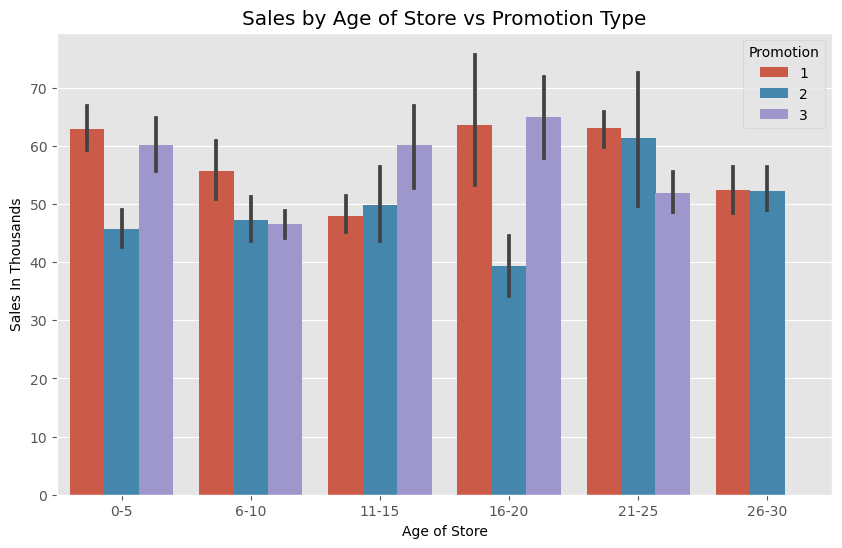

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='AgeBin', y='Sales In Thousands', hue='Promotion')
plt.title('Sales by Age of Store vs Promotion Type')
plt.xlabel('Age of Store')
plt.ylabel('Sales In Thousands')
plt.legend(title='Promotion')
plt.show()

Insights: The highest sales is seen for promotion 3 at the age of store for the 16-20 bin, while the lowest sales is seen for promotion 2 for the same bin. Among all bins, it has been noticed that the 26-30 bin does not consist of promtion 3 option.

**Question 8 : Given the sales,see how many of them fall within each promotion type?**

In [43]:
med_sales = df['Sales In Thousands'].median()
df['Sales_Bins'] = np.where(df['Sales In Thousands']>=med_sales,'High-Sales','Low-Sales')
df['category'] = df['Sales_Bins'].astype(str)

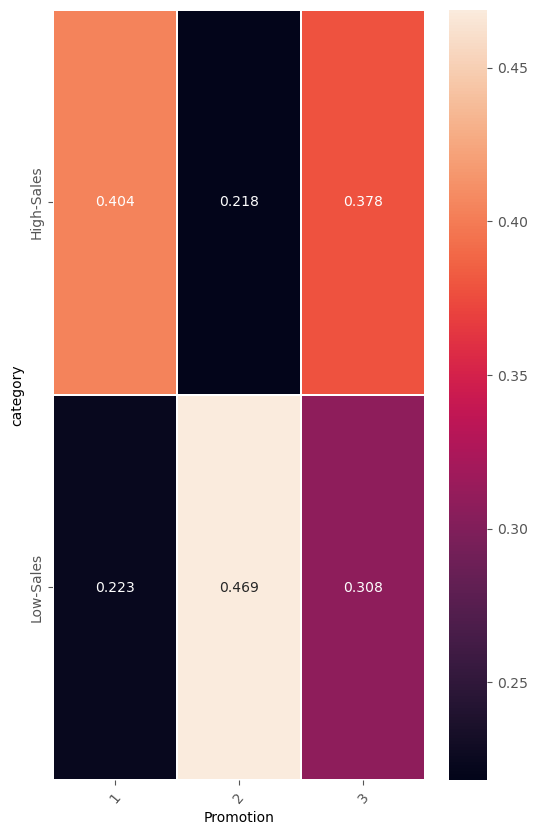

In [44]:
cross3= pd.crosstab(df['category'],df['Promotion'],normalize = 'index')

fig,ax = plt.subplots(figsize = (6,10))
sns.heatmap(cross3,annot=True,linewidth = 1.1,fmt = '1.3f',ax=ax)
ax.tick_params(axis='x', rotation=50)

Insights: Promotion 1 is among the promotion type that generates more high sales, while promotion 2 does the opposite as it generates more low sales.

#### Question 9: Promotion type that generates most and least sales by market size and Location ID

In [45]:
df.groupby(['Promotion','Market Size','Location ID'])[['Sales In Thousands']].sum().sort_values(by='Sales In Thousands',ascending=False)

Sales In Thousands
Promotion Market Size Location ID                    
1         Large       209                      380.36
                      218                      364.50
                      220                      361.37
                      210                      357.05
3         Large       208                      354.31
...                                               ...
2         Medium      2                        118.18
                      510                      117.95
                      5                        116.01
                      507                      112.57
                      8                        111.36

[137 rows x 1 columns]

Insights: Promotion 1 generates the highest sales when categorised by Market Size and Location ID, while promotion 2 generates the least sales.

**Question 10: Which promotion type is the most profitable given the Age of Store and Market ID?**

In [46]:
df.groupby(['Promotion','Market ID','Age Of Store'])[['Sales In Thousands']].sum().sort_values(by='Sales In Thousands',ascending=False)

Sales In Thousands
Promotion Market ID Age Of Store                    
1         10        1                         755.15
3         3         1                         698.96
                    4                         669.32
2         3         7                         629.71
1         1         12                        483.35
...                                              ...
3         6         5                         129.32
          1         10                        124.74
2         6         12                        124.02
                    7                         117.95
                    5                         112.57

[121 rows x 1 columns]

Insights: Promotion 1 generates the highest sales when categorised by Market ID and Age of Store, while promotion 2 generates the least sales.

**Question 11: What is the distribution of sales by promotion type?**

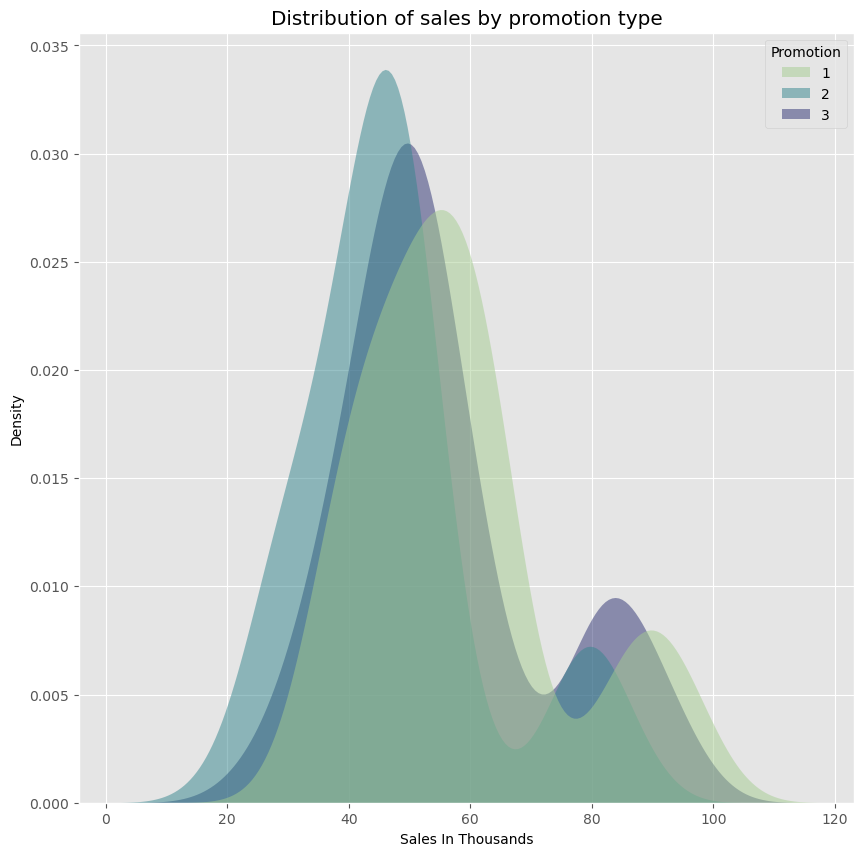

In [47]:
sns.kdeplot(data=df, x='Sales In Thousands', hue="Promotion",fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

plt.title('Distribution of sales by promotion type')
plt.show()

Insights: As seen from the KDE plot, promotion 2 generates lowest sales while promotion 1 generates the highest sales.

**Question 12: What is the distribution of sales by promotion type?**

In [52]:
df.groupby('Promotion')['Sales In Thousands'].agg([np.mean,np.median,np.size, np.std, np.min, np.max])

,mean,median,size,std,amin,amax
Promotion,,,,,,
1,58.099012,55.385,172,16.553782,30.81,99.65
2,47.329415,45.385,188,15.108955,17.34,88.64
3,55.364468,51.165,188,16.766231,22.18,96.48


**Question 13: Which Location ID has the highest sales by promotion type**

In [49]:
df["LocationBin"] = pd.cut(df["Location ID"], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], labels=["0-99", "100-199", "200-299", "300-399", "400-499", "500-599", "600-699", "700-799", "800-899", "900-999"])
df.groupby('LocationBin')['Sales In Thousands'].agg([np.mean,np.sum])

,mean,sum
LocationBin,,
0-99,35.101731,1825.29
100-199,61.761250,1482.27
200-299,84.971705,7477.51
300-399,54.508056,1962.29
400-499,48.838000,2930.28
500-599,36.397500,2183.85
600-699,44.475333,2668.52
700-799,48.952917,2349.74
800-899,52.940750,2117.63


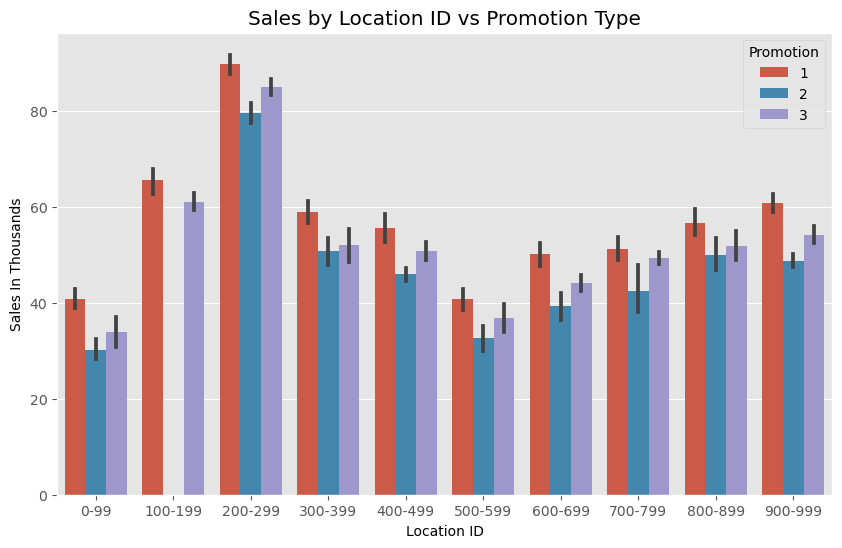

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='LocationBin', y='Sales In Thousands', hue='Promotion')
plt.title('Sales by Location ID vs Promotion Type')
plt.xlabel('Location ID')
plt.ylabel('Sales In Thousands')
plt.legend(title='Promotion')
plt.show()

Insights: Location IDs between 200-299 generated the highest sales, while the Location IDs between 0-99 has the lowest sales. Across the whole plot,promotion 1 generates the highest sales (for every bin) while promotion 2 generates the lowest sales.
    
Note: Location IDs between 100-199 does not consist of sales generated from promotion 2.

## Conclusion
- Among the 3 promotion types, promotion 1 generates the most sales while promotion 2 generates the least sales.
- Market ID 3 generates the most sales on aggregate while Market ID 1 generates the lowest sales.Among the 3 promotion types, promotion 1 generates the highest sales whil promotion 3 generates the lowest sales for all Market IDs.
- Large market size is seen to generate the most sales in aggregate as compared to small and medium market size.
- Location IDs between 200-299 generated the highest sales, while the Location IDs between 0-99 has the lowest sales.
- The majority of stores are aged between 0-15 years as compared to very few stores aged 16 years and above.
- There is no significant fluctuation between the sales amount for all 3 promotion types across the 4 week period.

## Next steps
- The fast-food chain should adopt promotion 1 as their future marketing strategy to market their new product. 

- The markets they should focus on are markets with the following characteristics: Large Market Size, Market ID 3, Location ID between 200-299 and stores aged between 0-5 years as these are the areas that generated the highest sales.
